In [ ]:
!unzip "/content/TripAdvisor.zip"

unzip:  cannot find or open /content/TripAdvisor.zip, /content/TripAdvisor.zip.zip or /content/TripAdvisor.zip.ZIP.


In [ ]:
!unzip TripAdvisor\ Review\ Data.zip

unzip:  cannot find or open TripAdvisor Review Data.zip, TripAdvisor Review Data.zip.zip or TripAdvisor Review Data.zip.ZIP.


In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [ ]:
data = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
wc = WordCloud(max_words=200, regexp="[a-z']+", width = 800, height = 400, stopwords=STOPWORDS, random_state=123456)

In [ ]:
only_reviews = ' '.join(data['Review'])

In [ ]:
only_reviews

In [ ]:
import matplotlib.pyplot as plt

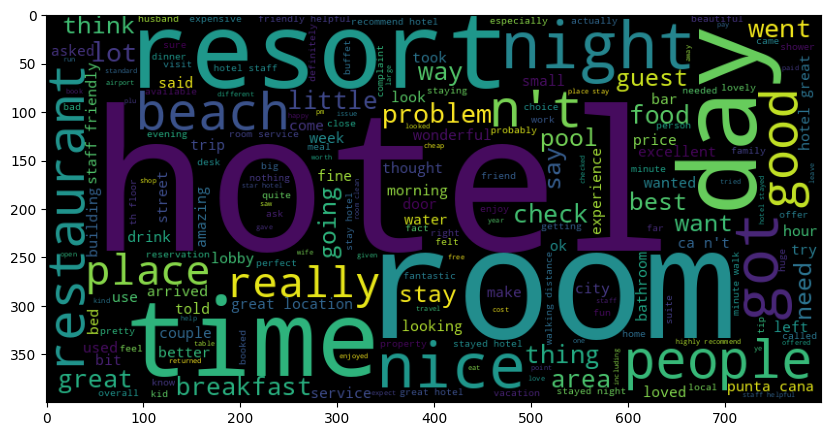

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc.generate_from_text(only_reviews))
plt.show()

In [ ]:
only_reviews_positive = ' '.join(data[data['Rating']>=4]['Review'])
only_reviews_negative = ' '.join(data[data['Rating']<=2]['Review'])

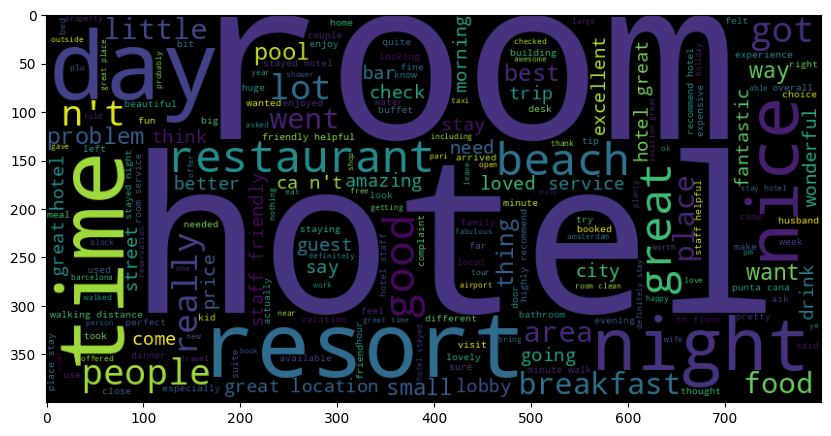

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc.generate_from_text(only_reviews_positive))
plt.show()

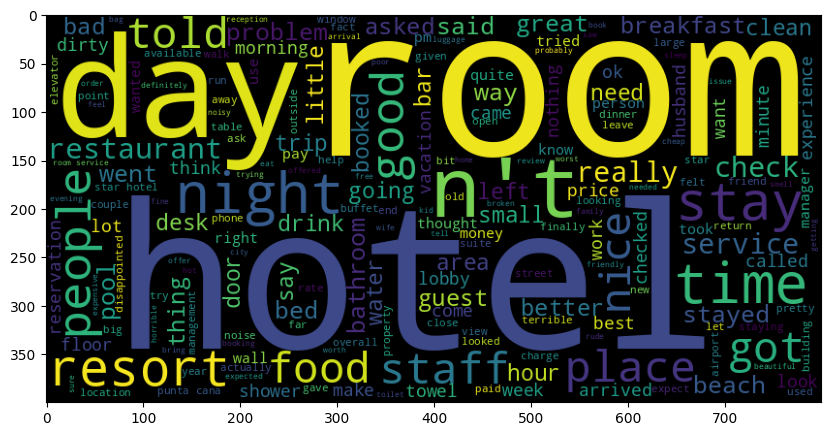

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc.generate_from_text(only_reviews_negative))
plt.show()

In [ ]:
import re

In [ ]:
positive_reviews_tokens = re.findall("[a-z']+", only_reviews_positive.lower())

In [ ]:
len(positive_reviews_tokens)

1506534

In [ ]:
positive_reviews_tokens_no_stopwords = [x for x in positive_reviews_tokens if x not in STOPWORDS]

In [ ]:
len(positive_reviews_tokens_no_stopwords)

1431580

In [ ]:
stopword_new = STOPWORDS.copy()

In [ ]:
stopword_new.add('hotel')
stopword_new.add('hotels')

In [ ]:
from collections import Counter

In [ ]:
C = Counter(positive_reviews_tokens_no_stopwords)

In [ ]:
top_200_words = C.most_common(200)

In [ ]:
top_200_words = {k:v for k,v in C.most_common(200)}

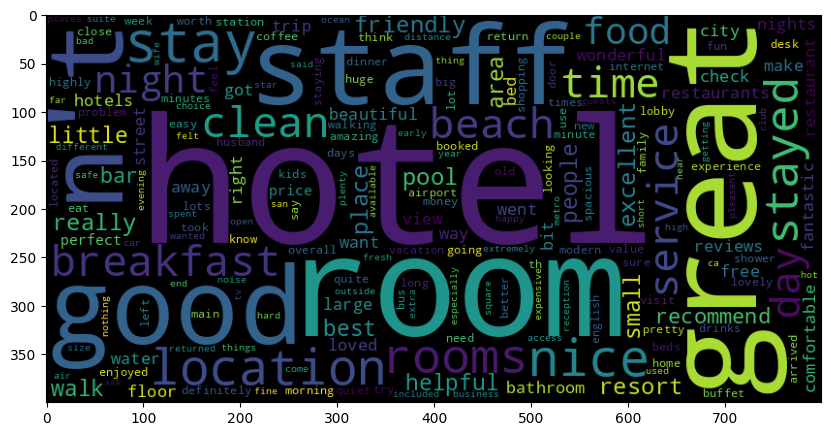

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc.generate_from_frequencies(top_200_words))
plt.show()

In [ ]:
set(top_200_words.keys()) 

{'access',
 'air',
 'airport',
 'amazing',
 'area',
 'arrived',
 'ask',
 'available',
 'away',
 'bad',
 'bar',
 'bathroom',
 'beach',
 'beautiful',
 'bed',
 'beds',
 'best',
 'better',
 'big',
 'bit',
 'booked',
 'breakfast',
 'buffet',
 'bus',
 'business',
 'ca',
 'car',
 'check',
 'choice',
 'city',
 'clean',
 'close',
 'club',
 'coffee',
 'come',
 'comfortable',
 'couple',
 'day',
 'days',
 'definitely',
 'desk',
 'different',
 'dinner',
 'distance',
 'door',
 'drinks',
 'early',
 'easy',
 'eat',
 'end',
 'english',
 'enjoyed',
 'especially',
 'evening',
 'excellent',
 'expensive',
 'experience',
 'extra',
 'extremely',
 'family',
 'fantastic',
 'far',
 'feel',
 'felt',
 'fine',
 'floor',
 'food',
 'free',
 'fresh',
 'friendly',
 'fun',
 'getting',
 'going',
 'good',
 'got',
 'great',
 'guests',
 'happy',
 'hard',
 'helpful',
 'high',
 'highly',
 'home',
 'hot',
 'hotel',
 'hotels',
 'huge',
 'husband',
 'included',
 'internet',
 'kids',
 'know',
 'large',
 'left',
 'little',
 'lobb

In [ ]:
exclusive_positive_words = ['access','amazing', 'easy', 'excellent', 'family', 'kids']

In [ ]:
exclusive_positive_words_dictionary = {}
for key in list(top_200_words.keys()):
  if key in exclusive_positive_words:
    exclusive_positive_words_dictionary[key]=top_200_words[key]

In [ ]:
exclusive_positive_words_dictionary

{'excellent': 5556,
 'amazing': 1968,
 'easy': 1864,
 'family': 1651,
 'kids': 1621,
 'access': 1282}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
tf = CountVectorizer(token_pattern="[a-z']+", max_df=0.8, min_df=10, ngram_range=(2,2))

In [ ]:
tf_mat = tf.fit_transform(data['Review'])

In [ ]:
bigram_word_freq_count = tf_mat.sum(axis=0)

In [ ]:
tf.vocabulary_

{'nice hotel': 12694,
 'hotel expensive': 8638,
 'got good': 7480,
 'good deal': 7220,
 'deal stay': 4368,
 'stay hotel': 19657,
 'arrived late': 620,
 'late evening': 10267,
 'took advice': 21096,
 'previous reviews': 15446,
 'reviews did': 16846,
 'valet parking': 21802,
 'check quick': 3121,
 'quick easy': 15740,
 'little disappointed': 10632,
 'non existent': 13361,
 'view room': 21922,
 'room room': 17467,
 'room clean': 17128,
 'clean nice': 3412,
 'nice size': 12774,
 'size bed': 18654,
 'bed comfortable': 1619,
 'pillows not': 14833,
 'room night': 17373,
 'night morning': 12929,
 'opening closing': 14180,
 'hear people': 8061,
 'people talking': 14666,
 'maybe just': 11683,
 'aveda bath': 827,
 'bath products': 1205,
 'products nice': 15636,
 'nice did': 12664,
 'did not': 4665,
 'stay nice': 19697,
 'nice touch': 12794,
 'staying longer': 19987,
 'location great': 10908,
 'great walking': 7811,
 'walking distance': 22207,
 'distance shopping': 4905,
 'overall nice': 14294,
 '

In [ ]:
sorted_vocab = tf.vocabulary_

In [ ]:
tf = CountVectorizer(token_pattern = "[a-z']+", max_df = 0.8, min_df = 10, ngram_range=(2,2))

In [ ]:
tf_mat = tf.fit_transform(data['Review'])

In [ ]:
bigram_word_freq_count = tf_mat.sum(axis=0)

In [ ]:
sorted_vocab = {k:v for k,v in sorted(tf.vocabulary_.items(), key=lambda x:x[1], reverse =False)}

In [ ]:
tf.get_feature_names_out()

array(['a bit', 'a c', 'a couple', ..., 'yunque rainforest', 'zona rosa',
       'zoo station'], dtype=object)

In [ ]:
bigram_freq = {k:v for k,v in zip(tf.get_feature_names_out(), np.array(bigram_word_freq_count)[0])}

In [ ]:
bigram_freq

{'a bit': 10,
 'a c': 378,
 'a couple': 12,
 'a good': 10,
 'a great': 13,
 'a la': 44,
 'a m': 266,
 'aaa rate': 19,
 'abc store': 17,
 'abc stores': 12,
 'able access': 14,
 'able book': 30,
 'able buy': 10,
 'able change': 10,
 'able check': 82,
 'able communicate': 17,
 'able eat': 27,
 'able enjoy': 33,
 'able good': 15,
 'able great': 11,
 'able hear': 13,
 'able help': 14,
 'able leave': 27,
 'able make': 37,
 'able open': 14,
 'able pick': 10,
 'able recommend': 10,
 'able relax': 11,
 'able room': 33,
 'able sit': 19,
 'able sleep': 35,
 'able speak': 14,
 'able spend': 10,
 'able stay': 33,
 'able use': 58,
 'able walk': 111,
 'absolute best': 23,
 'absolute worst': 13,
 'absolutely amazing': 53,
 'absolutely beautiful': 135,
 'absolutely best': 26,
 'absolutely breathtaking': 10,
 'absolutely charming': 13,
 'absolutely delicious': 15,
 'absolutely fabulous': 33,
 'absolutely fantastic': 52,
 'absolutely gorgeous': 56,
 'absolutely great': 22,
 'absolutely horrible': 12,
 'a

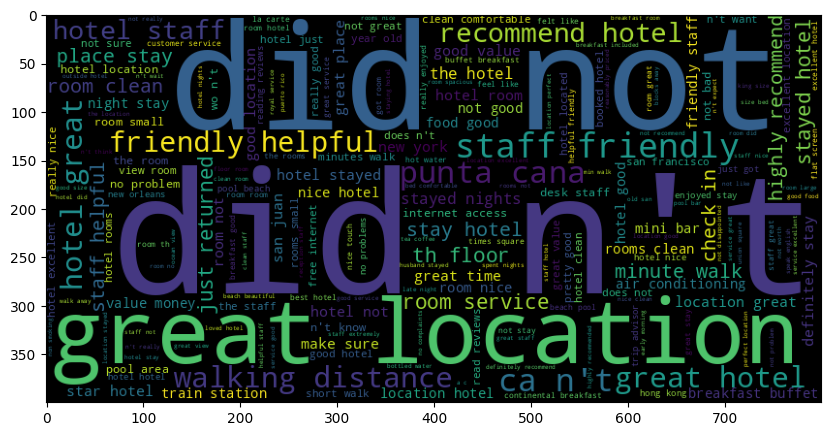

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc.generate_from_frequencies(bigram_freq))
plt.show()